############################################################################################
################## -- Programa de Especialización en Data Science Nivel I --##########################
############################################################################################

Modelos Clasificación : Modelos Basados Arboles - CHAID ,CART C50.

Autores : José Cárdenas - André Chávez 

In [6]:
#######################################################################
################ Modelos Basados en Árboles ###########################
#######################################################################

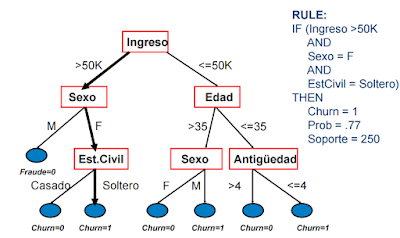

In [1]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [6]:
# Leer el dataset en un dataframe usando pandas
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/train.csv") 

In [7]:
train.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [8]:
# Revisar los valores perdidos, existen valores perdidos.
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [10]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
#train_parametrica.head(5)

In [11]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())   

In [12]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [13]:
train_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0


In [14]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [15]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status'], 
                                                    test_size=0.30)

In [ ]:
#######################################################################
##### Modelos Basados en Arboles : Arbol CART #########################
#######################################################################

In [35]:
## Paso N° 01 : Entrenar un modelo
from sklearn.tree import DecisionTreeClassifier
#Parámetros del árbol de clasificación
# criterion  , splitter ,max_depth,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,splitter
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features=8,splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
import graphviz

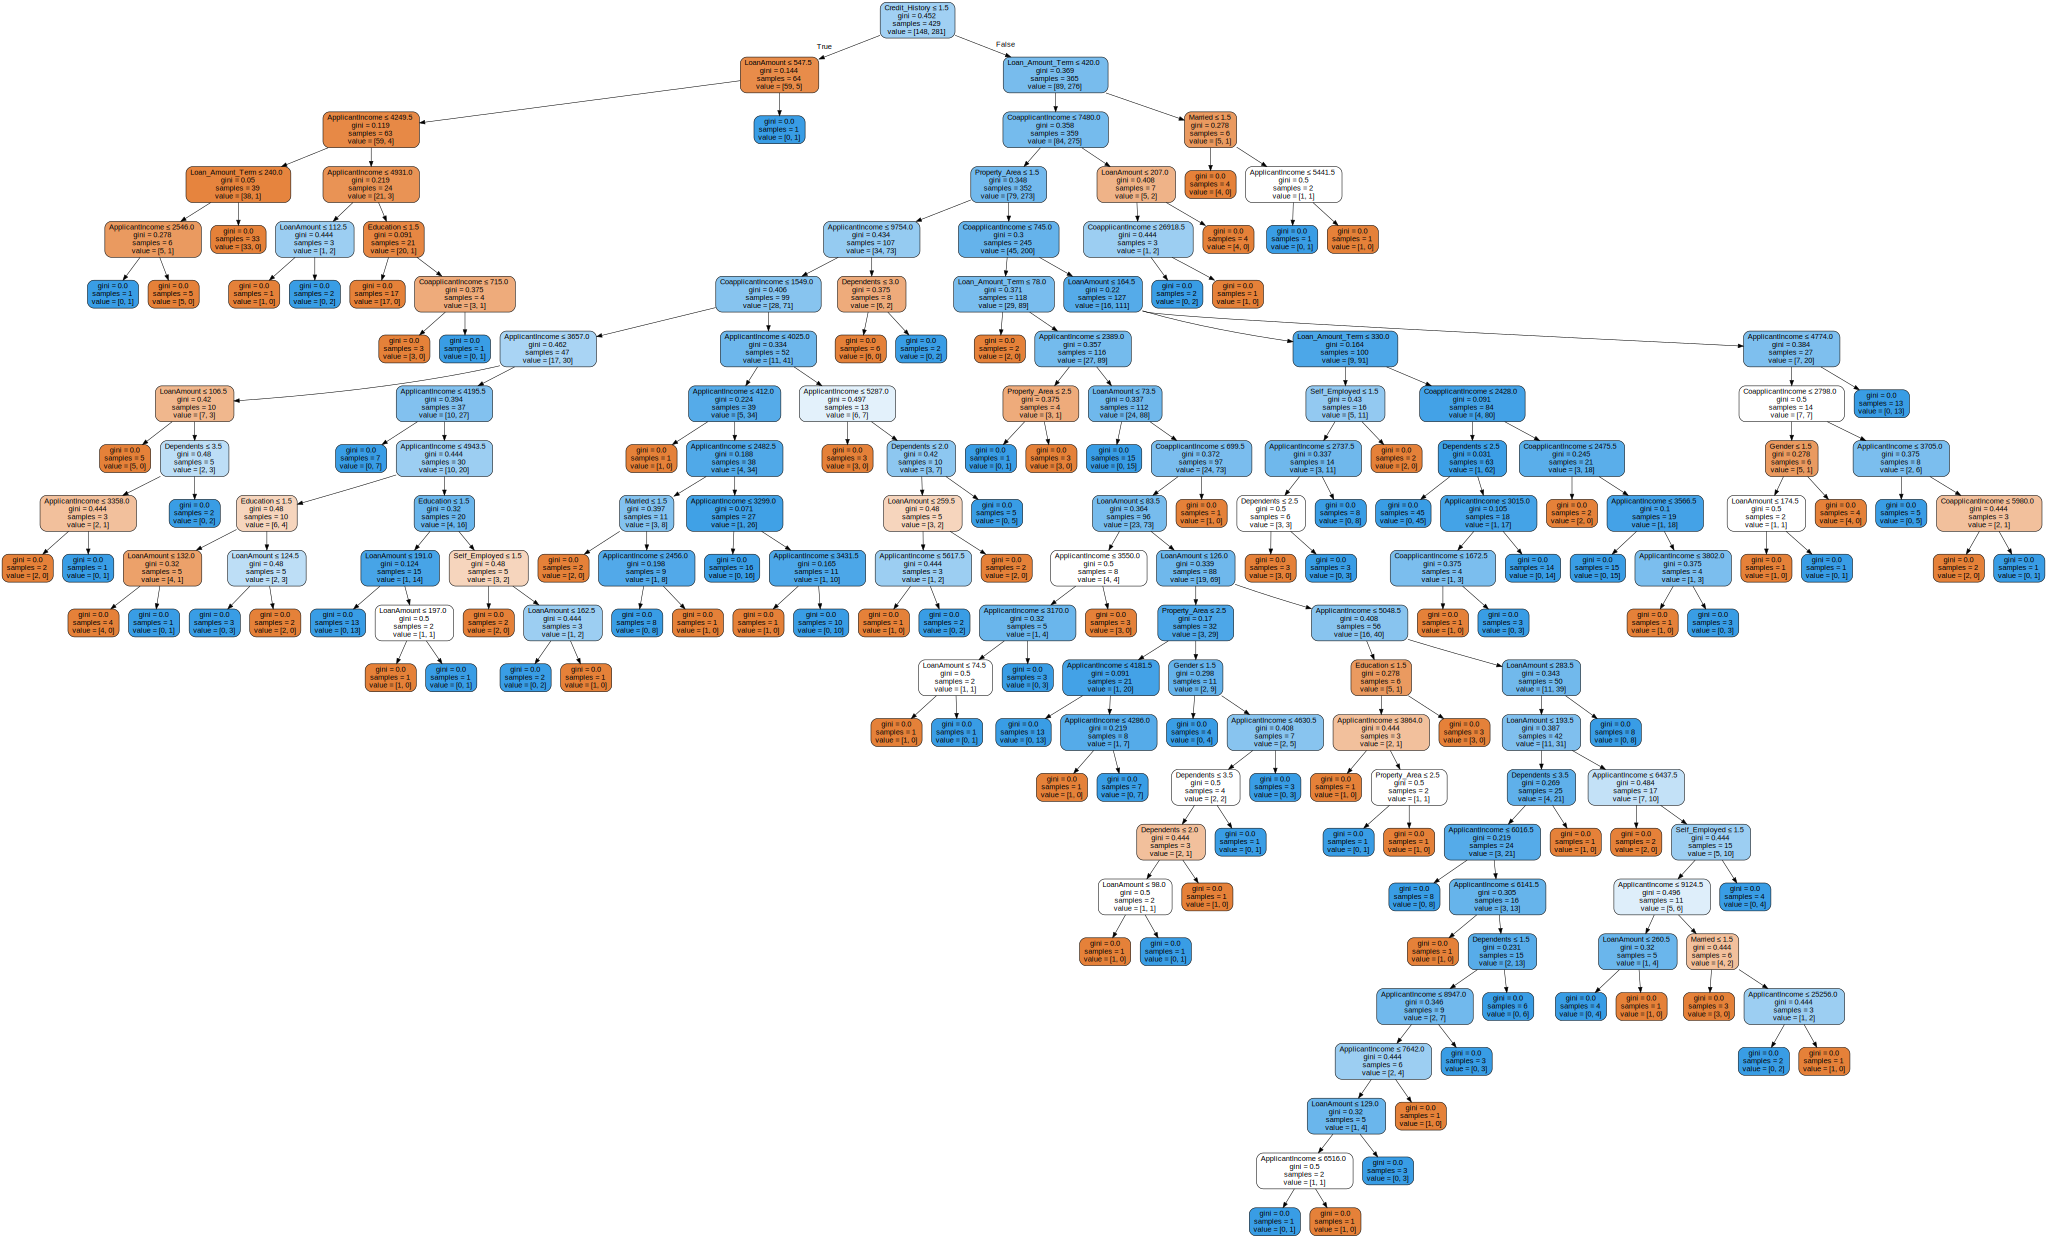

In [18]:
# Podemos ver el arbol para entender las particiones
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_train.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [36]:
## Paso N° 02 : Predecir sobre la data de test con el modelo entrenado
y_pred = clf.predict(X_test)

In [37]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.822

	Precision: 0.851
	Recall: 0.929
	F1: 0.888



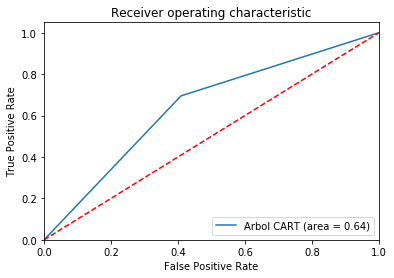

In [23]:
## Paso N° 03 : Evaluar indicadores

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

arb = DecisionTreeClassifier()
arb.fit(X_train, y_train)

arbol_roc_auc = roc_auc_score(y_test, arb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, arb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Arbol CART (area = %0.2f)' % arbol_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Arbol_CART_ROC')
plt.show()

In [24]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.40      0.57      0.47        44
          1       0.85      0.74      0.79       141

avg / total       0.74      0.70      0.71       185



In [38]:
## Paso N° 03 : Evaluar indicadores
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=100, random_state=7)
arb = DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features=8,splitter='best')
scoring = 'accuracy'
results = model_selection.cross_val_score(arb, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.752


In [26]:
## Paso N° 04: Puntuamos o scoreamos sobre información nueva o clientes sin VD.
# Como ya hemos entrenado un Modelo de Clasificación , podemos trabajar con el archivo de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [27]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [28]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [29]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median())  

In [30]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [31]:
test_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3


In [32]:
# Eliminamos el ID para poder scorear o puntuar los registros
test_parametrica = test_parametrica.drop('Loan_ID', axis=1) 

In [39]:
y_final = clf.predict(test_parametrica) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

In [ ]:
#y_final

In [40]:
data = np.hstack((test['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Algoritmo_Cart_002.csv', index=False)

In [ ]:
## !! Listo , lo evaluamos en AnalyticsVidhya !!

In [26]:
# Nota: Utilidad de los Arboles de Decisión

In [42]:
#Creamos nuevas variables a partir de cortes que obtenemos del árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
feature_cols = ['ApplicantIncome'] # Elegir una VI
X_train=train_parametrica[feature_cols] # Ponemos la variable independiente o feature para poder ver cortes.
Y_train=train_parametrica[['Loan_Status']] # Ponemos la variable dependiente.
treeclf = DecisionTreeClassifier(max_depth=1, random_state=1) # Acá definimos los parámetros del árbol
treeclf.fit(X_train, Y_train)  # Ajusto un algoritmo sobre unas covariables y una vd
export_graphviz(treeclf, out_file='Recodificacion_Arbol02.dot', feature_names=feature_cols)

In [46]:
train_parametrica.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Recod
0,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1,2
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0,2


In [45]:
# Creamos una lista vacía para guardar los nuevos valores de los campos creados
ApplicantIncome_Recod = []
# Para cada fila o registro en la variable ApplicantIncome , le aplicamos 
for row in train_parametrica['ApplicantIncome']:
    # Si el registro es menor al valor ,
    if row <1921:
        # Recodificar la variable con 1
        ApplicantIncome_Recod.append(1)
     
    else: # Sino
        # Recodificar la variable con 2
        ApplicantIncome_Recod.append(2)
        
# Create a column from the list
train_parametrica['ApplicantIncome_Recod'] = ApplicantIncome_Recod

In [52]:
# Creamos una lista vacía para guardar los nuevos valores de los campos creados
ApplicantIncome_Recod2 = []
# Para cada fila o registro en la variable ApplicantIncome , le aplicamos 
for row in train_parametrica['ApplicantIncome']:
    # Si el registro es menor al valor ,
    if row <1824:
        # Recodificar la variable con 1
        ApplicantIncome_Recod2.append(1)
    elif row <1921:
        ApplicantIncome_Recod2.append(2)
      
    else: # Sino
        # Recodificar la variable con 2
        ApplicantIncome_Recod2.append(3)
        
# Create a column from the list
train_parametrica['ApplicantIncome_Recod2'] = ApplicantIncome_Recod2

In [54]:
train_parametrica.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Recod,ApplicantIncome_Recod2
0,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1,2,3
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0,2,3
2,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1,2,3
3,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1,2,3
4,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1,2,3
5,2.0,2.0,3.0,1,2.0,5417,4196.0,267.0,360.0,2.0,3,1,2,3
6,2.0,2.0,1.0,2,1.0,2333,1516.0,95.0,360.0,2.0,3,1,2,3
7,2.0,2.0,4.0,1,1.0,3036,2504.0,158.0,360.0,1.0,2,0,2,3
8,2.0,2.0,3.0,1,1.0,4006,1526.0,168.0,360.0,2.0,3,1,2,3
9,2.0,2.0,2.0,1,1.0,12841,10968.0,349.0,360.0,2.0,2,0,2,3


Terminamos!!!